```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```

## 导入依赖

In [1]:
# - 矩阵运算
import numpy as np
# - 图像处理
import cv2 
# - 绘图可视化
from matplotlib import pyplot as plt
# - 点云处理
import open3d as o3d

# 自定义库
# 从阿凯机器人工具箱导入Gemini335类
from kyle_robot_toolbox.camera import Gemini335
from kyle_robot_toolbox.open3d import draw_geometry

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


pybullet build time: Jun  3 2022 02:05:55


[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux
[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux


In [2]:
%matplotlib inline

## 相机初始化

In [2]:
# 创建相机对象
camera = Gemini335()

[05/29 12:57:51.284953][info][14008][Context.cpp:68] Context created with config: default config!
[05/29 12:57:51.284967][info][14008][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/deepsense-gemini335/04.Gemini335-3D相机案例源码/basic-example, SDK version=v1.10.5-20240511-7dc8be9
[05/29 12:57:51.284986][info][14008][LinuxPal.cpp:31] createObPal: create LinuxPal!
[05/29 12:57:51.456199][info][14008][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[05/29 12:57:51.456216][info][14008][DeviceManager.cpp:15] Current found device(s): (1)
[05/29 12:57:51.456220][info][14008][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2
[05/29 12:57:51.924025][error][14008][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }
[05/29 12:57:51.924266][error][14008][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


## 获取深度图

In [4]:
# 读取深度图
depth_img = camera.read_depth_img()

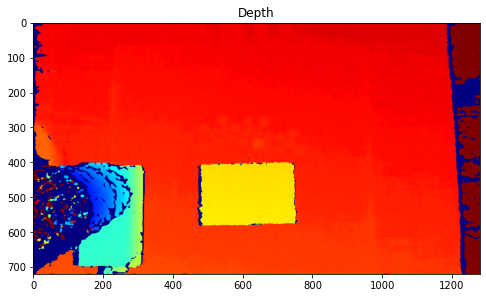

In [5]:
plt.figure(figsize=(8, 6))

plt.title("Depth")
depth_canvas = camera.depth_img2canvas(depth_img, min_distance=200, max_distance=500)
plt.imshow(depth_canvas[:, :, ::-1])

plt.savefig("data/read_pcd_depth/depth.png")

## 获取点云

In [6]:
# 使用彩色相机的内参生成点云
# 设置点云 Z轴坐标有效范围 [min_distance, max_distance]
# 根据自己实际情况进行调整
pcd = camera.get_pcd2(depth_img, \
                      min_distance=200,  max_distance=500, \
                      rgb_color=depth_canvas)

In [7]:
# 展示点云
draw_geometry([pcd], window_name="深度图点云")